### Checkpoint neural network model improvements

In [1]:
!ls

Checkpoint-Neural-Network.ipynb  iris.data.2	 pima-indians-diabetes.data.csv
Deep-learning-day1.ipynb	 model_plot.png  sonar.all-data
Deep-learning-projects.ipynb	 Models		 Weights


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load pima indians dataset
dataset = np.loadtxt('pima-indians-diabetes.data.csv', delimiter=',')
# split data into input(X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath = 'Weights/weights-improvement-{epoch:2d}--{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.67323, saving model to Weights/weights-improvement- 1--0.67.hdf5

Epoch 00002: val_accuracy did not improve from 0.67323

Epoch 00003: val_accuracy did not improve from 0.67323

Epoch 00004: val_accuracy improved from 0.67323 to 0.68110, saving model to Weights/weights-improvement- 4--0.68.hdf5

Epoch 00005: val_accuracy improved from 0.68110 to 0.70079, saving model to Weights/weights-improvement- 5--0.70.hdf5

Epoch 00006: val_accuracy did not improve from 0.70079

Epoch 00007: val_accuracy did not improve from 0.70079

Epoch 00008: val_accuracy did not improve from 0.70079

Epoch 00009: val_accuracy did not improve from 0.70079

Epoch 00010: val_accuracy did not improve from 0.70079

Epoch 00011: val_accuracy did not improve from 0.70079

Epoch 00012: val_accuracy improved from 0.70079 to 0.70866, saving model to Weights/weights-improvement-12--0.71.hdf5

Epoch 00013: val_accuracy did not improve from 0.70866

Epoch 00014: val_accur


Epoch 00133: val_accuracy improved from 0.79134 to 0.79921, saving model to Weights/weights-improvement-133--0.80.hdf5

Epoch 00134: val_accuracy did not improve from 0.79921

Epoch 00135: val_accuracy did not improve from 0.79921

Epoch 00136: val_accuracy did not improve from 0.79921

Epoch 00137: val_accuracy did not improve from 0.79921

Epoch 00138: val_accuracy did not improve from 0.79921

Epoch 00139: val_accuracy did not improve from 0.79921

Epoch 00140: val_accuracy did not improve from 0.79921

Epoch 00141: val_accuracy did not improve from 0.79921

Epoch 00142: val_accuracy did not improve from 0.79921

Epoch 00143: val_accuracy did not improve from 0.79921

Epoch 00144: val_accuracy did not improve from 0.79921

Epoch 00145: val_accuracy did not improve from 0.79921

Epoch 00146: val_accuracy did not improve from 0.79921

Epoch 00147: val_accuracy did not improve from 0.79921

Epoch 00148: val_accuracy did not improve from 0.79921

Epoch 00149: val_accuracy did not impro

### Checkpoint neural network model the best model

In [7]:
# checkpoint only best
filepath = 'Weights/weights-best/weights-best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [8]:
# fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.75984, saving model to Weights/weights-best/weights-best.hdf5

Epoch 00002: val_accuracy improved from 0.75984 to 0.79134, saving model to Weights/weights-best/weights-best.hdf5

Epoch 00003: val_accuracy did not improve from 0.79134

Epoch 00004: val_accuracy did not improve from 0.79134

Epoch 00005: val_accuracy did not improve from 0.79134

Epoch 00006: val_accuracy did not improve from 0.79134

Epoch 00007: val_accuracy did not improve from 0.79134

Epoch 00008: val_accuracy did not improve from 0.79134

Epoch 00009: val_accuracy did not improve from 0.79134

Epoch 00010: val_accuracy did not improve from 0.79134

Epoch 00011: val_accuracy did not improve from 0.79134

Epoch 00012: val_accuracy did not improve from 0.79134

Epoch 00013: val_accuracy did not improve from 0.79134

Epoch 00014: val_accuracy did not improve from 0.79134

Epoch 00015: val_accuracy did not improve from 0.79134

Epoch 00016: val_accuracy did not improve 


Epoch 00147: val_accuracy did not improve from 0.81102

Epoch 00148: val_accuracy did not improve from 0.81102

Epoch 00149: val_accuracy did not improve from 0.81102

Epoch 00150: val_accuracy did not improve from 0.81102


### Loading savedmodel

In [11]:
# create model since we did not save the model, we only saved the weights
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# load weights
model.load_weights('Weights/weights-best/weights-best.hdf5')
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Created model and loaded weights from file')
dataset = np.loadtxt('pima-indians-diabetes.data.csv', delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
accuracy: 78.12%


### Chapter 15: Understanding model behavior during training by plotting history

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


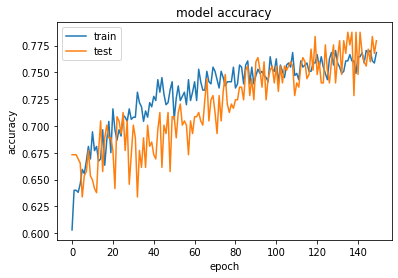

In [15]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

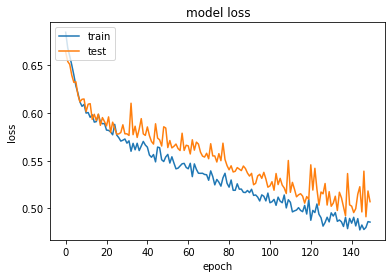

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

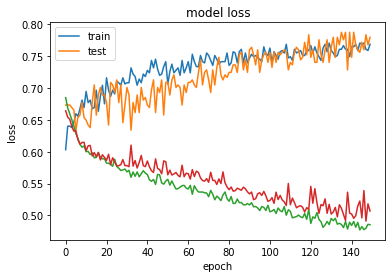

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
#plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()